In [30]:
pip install -U kagglehub

Note: you may need to restart the kernel to use updated packages.


In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\books\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [32]:
!git --version

git version 2.51.2.windows.1


In [33]:
!git config --global user.name "viclynndls"
!git config --global user.email "viclynndls@gmail.com"

In [34]:
!git init
!git add .
!git commit -m "Initial commit"

Initialized empty Git repository in C:/Users/books/OneDrive/Documents/DS Projects/Churn Prediction/.git/
[master (root-commit) a32b70a] Initial commit
 2 files changed, 7044 insertions(+)
 create mode 100644 Telco Codebook.xlsx
 create mode 100644 Telco Customer Churn.csv


In [35]:
!git remote add origin https://github.com/viclynndls/churn_prediction
!git branch -M main
!git push -u origin main

To https://github.com/viclynndls/churn_prediction
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/viclynndls/churn_prediction'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import os
print(os.getcwd())

C:\Users\books\OneDrive\Documents\DS Projects\Churn Prediction


In [38]:
os.chdir(r"C:\Users\books\OneDrive\Documents\DS Projects\Churn Prediction")

In [39]:
Telco = pd.read_csv("Telco Customer Churn.csv")

In [40]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
pip install pyjanitor

Note: you may need to restart the kernel to use updated packages.


In [42]:
import janitor

In [43]:
Telco = Telco.clean_names()

In [21]:
Telco['churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

In [22]:
churn_rate = Telco['churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 26.54%


In [45]:
# 1) Map to 0/1 safely
Telco['churn'] = (Telco['churn']
                    .astype(str).str.strip().str.title()   # normalize just in case
                    .map({'Yes': 1, 'No': 0}))

# 2) Quick checks
print(Telco['churn'].value_counts(dropna=False))
print("Nulls in churn:", Telco['churn'].isna().sum())
Telco.info()


0    5174
1    1869
Name: churn, dtype: int64
Nulls in churn: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 no

In [46]:
Telco['churn'].unique()

array([0, 1], dtype=int64)

In [47]:
Telco = pd.get_dummies(Telco, columns=['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 
                                       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 
                                       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'], drop_first=False)

In [48]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerid                               7043 non-null   object 
 1   seniorcitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   monthlycharges                           7043 non-null   float64
 4   totalcharges                             7043 non-null   object 
 5   churn                                    7043 non-null   int64  
 6   gender_Female                            7043 non-null   uint8  
 7   gender_Male                              7043 non-null   uint8  
 8   partner_No                               7043 non-null   uint8  
 9   partner_Yes                              7043 non-null   uint8  
 10  dependents_No                            7043 no

In [51]:
Telco['totalcharges'] = pd.to_numeric(Telco['totalcharges'], errors='coerce')


In [53]:
Telco['totalcharges'].info()
Telco['totalcharges'].isnull().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: totalcharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


11

In [54]:
Telco = Telco.dropna(subset=['totalcharges'])

In [57]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerid                               7032 non-null   object 
 1   seniorcitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   int64  
 3   monthlycharges                           7032 non-null   float64
 4   totalcharges                             7032 non-null   float64
 5   churn                                    7032 non-null   int64  
 6   gender_Female                            7032 non-null   uint8  
 7   gender_Male                              7032 non-null   uint8  
 8   partner_No                               7032 non-null   uint8  
 9   partner_Yes                              7032 non-null   uint8  
 10  dependents_No                            7032 no

In [60]:
Telco_numeric = Telco.drop(columns=['customerid'])
Telco_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   seniorcitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   monthlycharges                           7032 non-null   float64
 3   totalcharges                             7032 non-null   float64
 4   churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   partner_No                               7032 non-null   uint8  
 8   partner_Yes                              7032 non-null   uint8  
 9   dependents_No                            7032 non-null   uint8  
 10  dependents_Yes                           7032 no

In [61]:
corr_with_churn = Telco_numeric.corr(numeric_only=True)['churn'].sort_values(ascending=False)
corr_with_churn

churn                                      1.000000
contract_Month-to-month                    0.404565
onlinesecurity_No                          0.342235
techsupport_No                             0.336877
internetservice_Fiber optic                0.307463
paymentmethod_Electronic check             0.301455
onlinebackup_No                            0.267595
deviceprotection_No                        0.252056
monthlycharges                             0.192858
paperlessbilling_Yes                       0.191454
dependents_No                              0.163128
seniorcitizen                              0.150541
partner_No                                 0.149982
streamingmovies_No                         0.130920
streamingtv_No                             0.128435
streamingtv_Yes                            0.063254
streamingmovies_Yes                        0.060860
multiplelines_Yes                          0.040033
phoneservice_Yes                           0.011691
gender_Femal

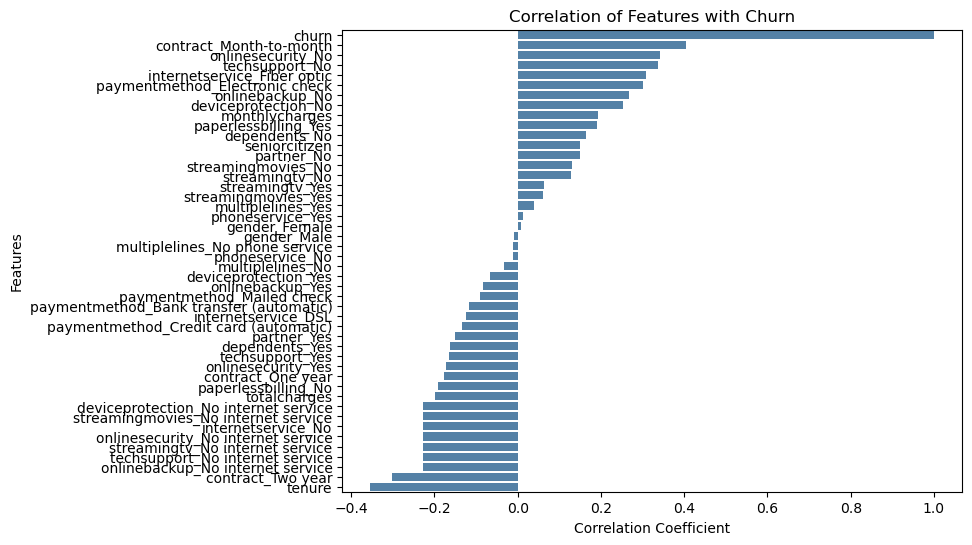

In [62]:
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, color='steelblue')
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(Telco_numeric.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

### Key Insights

- Customers who pay **month to month** have a **higher correlation with churning**
- Customers who don't have **online security** or **tech support** also have a **high correlation with churning**
- Customers who have **fiber optic internet services** and pay with an **electronic check** also have **high correlation with churning**

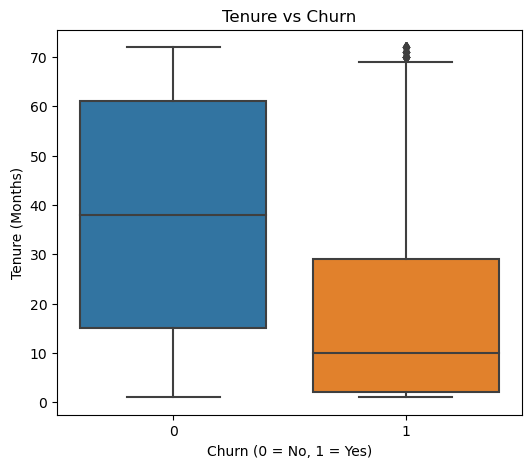

In [64]:
plt.figure(figsize=(6,5))
sns.boxplot(x='churn', y='tenure', data=Telco)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (Months)')
plt.show()

### 🔍 Key Insights

- Customers who **churned (1)** tend to have **much lower tenure**.
- Median tenure for churned customers is around **10 months**, while for retained customers it’s **~40 months**.
- This suggests **longer customer relationships reduce churn risk**.


In [65]:
!git init
!git add .
!git commit -m "Initial commit"

Reinitialized existing Git repository in C:/Users/books/OneDrive/Documents/DS Projects/Churn Prediction/.git/
On branch main
nothing to commit, working tree clean


In [68]:
pwd

'C:\\Users\\books\\OneDrive\\Documents\\DS Projects\\Churn Prediction'